In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel ('Online Retail.xlsx')


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Removing Null values
df=df.dropna()
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
# Converting the CustomerID from float to string
df["CustomerID"] = df["CustomerID"].astype(str)
df.CustomerID=df.CustomerID.str[:-2]
df.CustomerID.head()


0    17850
1    17850
2    17850
3    17850
4    17850
Name: CustomerID, dtype: object

In [8]:
# Dropping the InvoiceNo col because it is useless
df=df.drop(["InvoiceNo"], axis=1)
list(df.columns)

['StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [9]:
df.Quantity.value_counts()

 1      73314
 12     60033
 2      58003
 6      37688
 4      32183
        ...  
-51         1
 95         1
-162        1
 94         1
 342        1
Name: Quantity, Length: 436, dtype: int64

In [10]:
# There is no Negative or Zero Quantities
df = df[df["Quantity"]>0]

In [11]:
# Removing the rows that the customers didnot pay because the product is damaged
df = df[df["UnitPrice"]!=0]

In [12]:
x =df.Country.value_counts()
x

United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

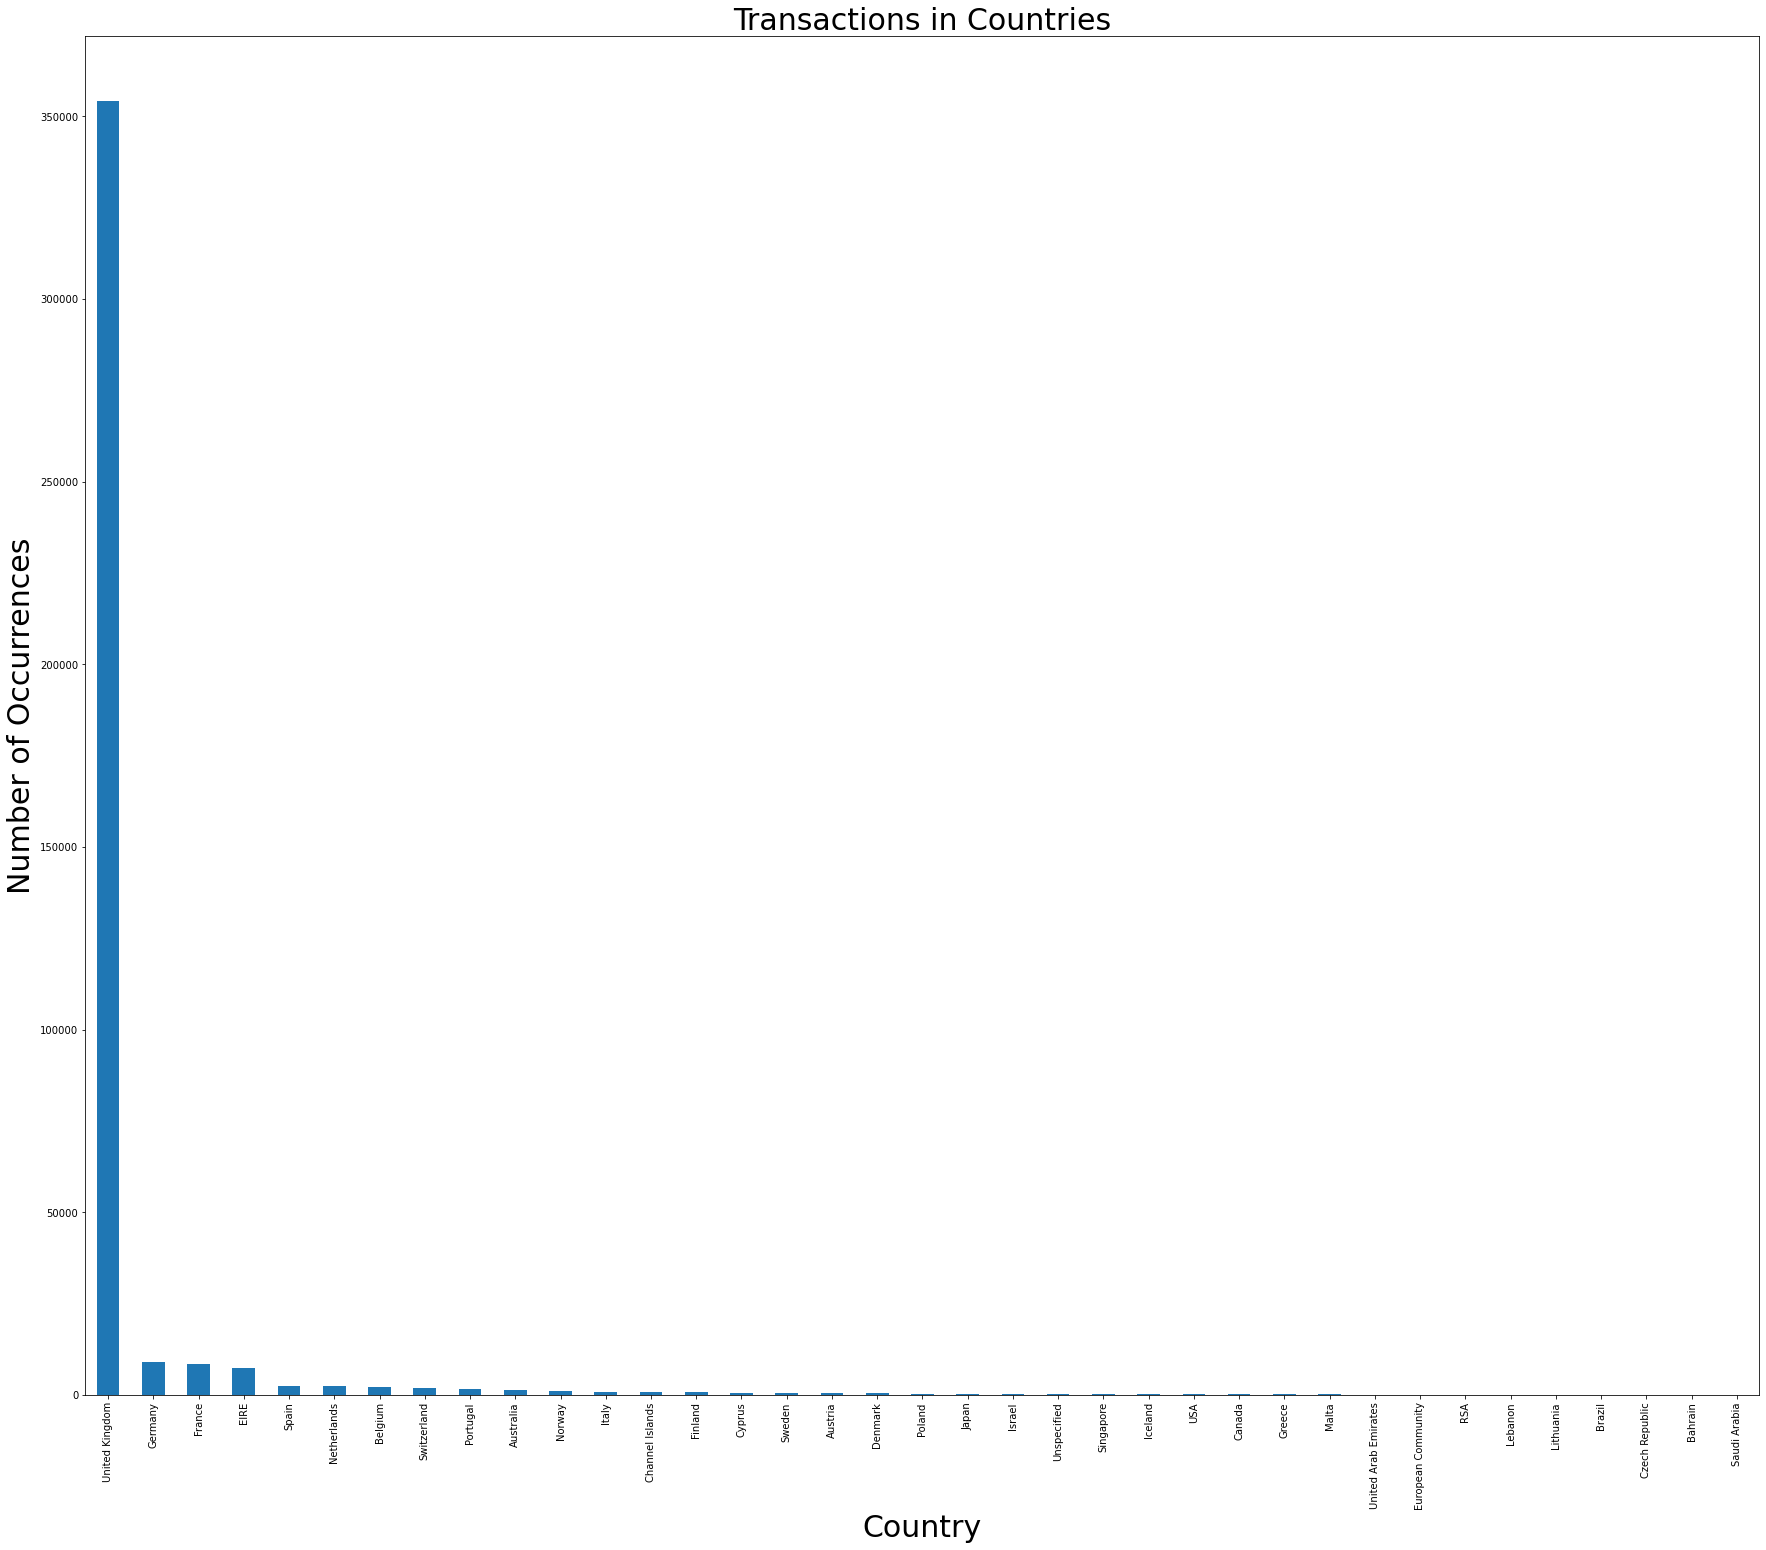

In [13]:
plt.figure(figsize=(30,25))
x.plot(kind = "bar")
plt.title('Transactions in Countries',fontsize=30)
plt.ylabel('Number of Occurrences', fontsize=30)
plt.xlabel('Country', fontsize=30)
plt.show()

In [14]:
# Top 5 frequent customers based on their ID
df["CustomerID"].value_counts().head()

17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
Name: CustomerID, dtype: int64

In [15]:
# Top 10 Customers how made the largest Revenue
df_grouped = df["UnitPrice"].groupby(df["CustomerID"])
y = df_grouped.sum().sort_values(ascending = False)[0:10]
y

CustomerID
14096    33332.45
14911    26185.72
17841    19848.49
12744    12949.99
12748    12205.60
12536     9070.93
16029     8722.39
14606     7595.75
15311     5961.86
14156     5357.68
Name: UnitPrice, dtype: float64

In [16]:
df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2028
REGENCY CAKESTAND 3 TIER               1723
JUMBO BAG RED RETROSPOT                1618
ASSORTED COLOUR BIRD ORNAMENT          1408
PARTY BUNTING                          1396
                                       ... 
GLASS BELL JAR LARGE                      1
NECKLACE+BRACELET SET PINK DAISY          1
BLUE GINGHAM ROSE CUSHION COVER           1
GLASS AND PAINTED BEADS BRACELET TO       1
DOORKNOB CERAMIC IVORY                    1
Name: Description, Length: 3877, dtype: int64

In [17]:
a= df.Description.str.len()
a

0         34
1         19
2         30
3         35
4         30
          ..
541904    27
541905    28
541906    29
541907    31
541908    29
Name: Description, Length: 397884, dtype: int64

(array([    0.,     0.,   284.,  1099.,   133.,   366.,   194.,   183.,
          605.,  2525.,  3974.,  1862.,  3151.,  5797., 11788.,  9860.,
        11251., 12738., 22905., 20121., 23327., 22473., 25278., 26244.,
        27435., 27585., 25991., 27047., 23171., 23095., 37402.]),
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
 <BarContainer object of 31 artists>)

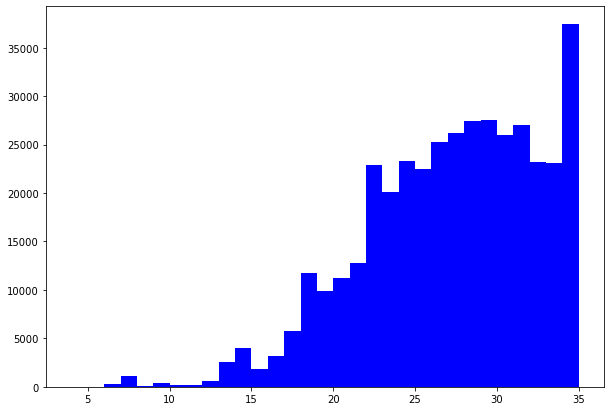

In [40]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(a,range=[5, 40],bins=np.arange(4,36,1),facecolor='blue', align='mid')


In [21]:
df["year"] = df.InvoiceDate.dt.year
df["month"] = df.InvoiceDate.dt.month
df["week"] = df.InvoiceDate.dt.isocalendar().week
df["weekday"] = df.InvoiceDate.dt.dayofweek
df["dayofyear"] = df.InvoiceDate.dt.dayofyear
df["day"] = df.InvoiceDate.dt.day
df["date"] = df.InvoiceDate.dt.date
df["Quarter"]= df.InvoiceDate.dt.quarter

In [22]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,week,week_day,dayofyear,day,date,weekday,Quarter
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,48,2,335,1,2010-12-01,2,4
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,48,2,335,1,2010-12-01,2,4
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,48,2,335,1,2010-12-01,2,4
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,48,2,335,1,2010-12-01,2,4
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,48,2,335,1,2010-12-01,2,4


In [23]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,week,week_day,dayofyear,day,date,weekday,Quarter,Revenue
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,48,2,335,1,2010-12-01,2,4,15.30
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,48,2,335,1,2010-12-01,2,4,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,48,2,335,1,2010-12-01,2,4,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,48,2,335,1,2010-12-01,2,4,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,48,2,335,1,2010-12-01,2,4,20.34


In [54]:
grouped = df[["date","year","Quarter","month","week","weekday","dayofyear","day","StockCode","Quantity","Revenue"]]
grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       397884 non-null  object 
 1   year       397884 non-null  int64  
 2   Quarter    397884 non-null  int64  
 3   month      397884 non-null  int64  
 4   week       397884 non-null  UInt32 
 5   weekday    397884 non-null  int64  
 6   dayofyear  397884 non-null  int64  
 7   day        397884 non-null  int64  
 8   StockCode  397884 non-null  object 
 9   Quantity   397884 non-null  int64  
 10  Revenue    397884 non-null  float64
dtypes: UInt32(1), float64(1), int64(7), object(2)
memory usage: 45.3+ MB


In [55]:
x = grouped[["year","Quarter","month","week","weekday","dayofyear","day","Quantity"]]
y = grouped[["Revenue"]]

In [56]:
from sklearn.model_selection import train_test_split


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [58]:
from sklearn.linear_model import LinearRegression


In [59]:
lm = LinearRegression()


In [60]:
lm.fit(x_train, y_train)


LinearRegression()

In [62]:
result = lm.predict(x_test)


In [77]:
r2_score = lm.score(x_test,y_test)
print(r2_score*100,'%')


34.28368034088732 %


In [75]:
import math

from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y_test,result))
rmse

62.19258508200686